In [1]:
# Reddit data analysis task starter.
import html
import json
import string
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.collocations import *
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# First collect the data in json-file (follow reddit_collect_data.ipynb); specify file name here
fjson = 'raw_post_comment_data.json'

In [3]:
# read json file with collected posts and comments
# https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files
with open(fjson) as file:
    data = json.load(file)
len(data)


50

In [4]:
# data record example
data[0]


{'id': 'w09kb3',
 'title': 'Monthly /r/ebikes promo thread',
 'text': 'This  thread is for anyone selling ebike products or services. Our posting  guidelines do not apply here; sellers can directly link to product  pages, provide updates and coupon codes, advertise ebay auctions and  crowdfunding campaigns and do other promotional activities without  worrying that it could be seen as spam.\n\nFront page posts are still acceptable for sellers to post actual news, articles, reviews, blog posts, videos and pictures. But if it is clearly marketing then it probably belongs here. Regular readers can of course create new threads to ask about anything posted in here. \n\nNote for [/r/ebikes](https://www.reddit.com/r/ebikes)  readers: Posts here do not constitute endorsement by anyone, use your best judgement and ask around to find out what is right for you.',
 'comments_lev1': ['If anyone is in the market for an Aventon, here is a code for 5% off.\n\nhttps://prz.io/bpL4eK0Hv',
  "RadPowerBikes

In [5]:
# create pandas dataframe from post titles
# https://stackoverflow.com/a/43175477
df_posts = pd.DataFrame([p['title'] for p in data], columns=['title'])
df_posts


,title
0,Monthly /r/ebikes promo thread
1,Bike friendly neighborhoods start at the local...
2,Loving my FLYER e-bike daily commute
3,Made a sheepskin cover for my new seat
4,Looking to get an e-bike but worried about it ...
5,"Went for a night ride. No bridge, I hope this’..."
6,The fact that a 750w motor turned me into a bi...
7,I Finally Bought My First eBike!! Would anyone...
8,"First ride, 108° in a monsoon just for the acc..."
9,[NBD] - I heard you guys like bridges


In [6]:
# add columns from other data fields: combine comment and sub-comment text
df_posts['post_id'] = [p['id'] for p in data]
df_posts['text'] = [p['text'] for p in data]
df_posts['comments_lev1'] = [' '.join(p['comments_lev1']) for p in data]
df_posts['comments_lev2'] = [' '.join(p['comments_lev2']) for p in data]
df_posts


,title,post_id,text,comments_lev1,comments_lev2
0,Monthly /r/ebikes promo thread,w09kb3,This thread is for anyone selling ebike produ...,"If anyone is in the market for an Aventon, her...","I know this is off topic, but I'm considering ..."
1,Bike friendly neighborhoods start at the local...,qa1nxo,1.\tTransportation infrastructure policy is la...,Started grassroots advocating a little over tw...,I’d love to hear your story and learn from you...
2,Loving my FLYER e-bike daily commute,w8jhrp,,Could you tell me more about this bike. It loo...,
3,Made a sheepskin cover for my new seat,w8irri,,Baller!! That’s cold lol Lmao that looks soooo...,It's a DirtyBike Industries fender: https://ww...
4,Looking to get an e-bike but worried about it ...,w8jhon,I live in Toronto and work downtown. Currently...,Ask your employer if you can take it inside\nM...,This. While social interactions can get awkwa...
5,"Went for a night ride. No bridge, I hope this’...",w85tch,,Fuck. Now everybody has to ride to D.C. and ta...,Why don't you do a picture within the state ca...
6,The fact that a 750w motor turned me into a bi...,w7p9so,,My bike has essentially replaced my car since ...,I didn't have a car prior - but now I'm able t...
7,I Finally Bought My First eBike!! Would anyone...,w8l35h,,Of course. Real reviews are helpful.,Absolutely will be as objective as possible (I...
8,"First ride, 108° in a monsoon just for the acc...",w88o91,,Do it for yourself homie. Respect! You've done...,"Thanks! Thank you! Thanks, Giant Talon Thank y..."
9,[NBD] - I heard you guys like bridges,w8ch9h,,Is that Morzine? Full suspension and mid drive...,Got it in one! Well recognised! Yeah for mount...


In [7]:
# text cleaning function: see prior class modules
stop_words = set(stopwords.words('english'))

# strictly speaking, this is a closure: uses a wider-scope variable stop_words
# (disregard this note if you are a Python beginner)
def text_cleanup(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)


In [8]:
# add clean text column with combined comments of both levels
# NOTE: apply in pandas applies a function to each element of the selected column
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
df_posts['text_clean'] = (df_posts['text'] + df_posts['comments_lev1'] + df_posts['comments_lev2']).apply(text_cleanup)
df_posts


,title,post_id,text,comments_lev1,comments_lev2,text_clean
0,Monthly /r/ebikes promo thread,w09kb3,This thread is for anyone selling ebike produ...,"If anyone is in the market for an Aventon, her...","I know this is off topic, but I'm considering ...",thread anyone selling ebike products services ...
1,Bike friendly neighborhoods start at the local...,qa1nxo,1.\tTransportation infrastructure policy is la...,Started grassroots advocating a little over tw...,I’d love to hear your story and learn from you...,transportation infrastructure policy largely d...
2,Loving my FLYER e-bike daily commute,w8jhrp,,Could you tell me more about this bike. It loo...,,could tell bike looks awesome cargo bike tubes...
3,Made a sheepskin cover for my new seat,w8irri,,Baller!! That’s cold lol Lmao that looks soooo...,It's a DirtyBike Industries fender: https://ww...,baller thats cold lol lmao looks soooo comfy a...
4,Looking to get an e-bike but worried about it ...,w8jhon,I live in Toronto and work downtown. Currently...,Ask your employer if you can take it inside\nM...,This. While social interactions can get awkwa...,live toronto work downtown currently take tran...
5,"Went for a night ride. No bridge, I hope this’...",w85tch,,Fuck. Now everybody has to ride to D.C. and ta...,Why don't you do a picture within the state ca...,fuck everybody ride take obligatory picture im...
6,The fact that a 750w motor turned me into a bi...,w7p9so,,My bike has essentially replaced my car since ...,I didn't have a car prior - but now I'm able t...,bike essentially replaced car since got april ...
7,I Finally Bought My First eBike!! Would anyone...,w8l35h,,Of course. Real reviews are helpful.,Absolutely will be as objective as possible (I...,course real reviews objective possible im conn...
8,"First ride, 108° in a monsoon just for the acc...",w88o91,,Do it for yourself homie. Respect! You've done...,"Thanks! Thank you! Thanks, Giant Talon Thank y...",homie respect done good real good nice simple ...
9,[NBD] - I heard you guys like bridges,w8ch9h,,Is that Morzine? Full suspension and mid drive...,Got it in one! Well recognised! Yeah for mount...,morzine full suspension mid drive anyway next ...


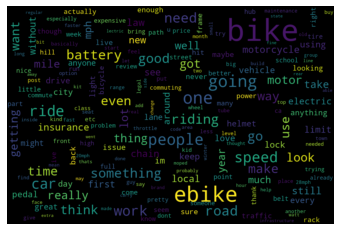

In [9]:
# most common keywords
# https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud
text_combined = ' '.join(df_posts['text_clean'])
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(text_combined)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [10]:
# extract keyword counts
# https://stackoverflow.com/questions/60234036/python-word-count-from-wordcloud
kwords = WordCloud().process_text(text_combined)
kwords

{'thread': 2,
 'anyone': 26,
 'selling': 3,
 'ebike': 140,
 'posting': 2,
 'guidelines': 1,
 'apply': 3,
 'directly': 3,
 'link': 9,
 'product': 8,
 'provide': 5,
 'updates': 1,
 'coupon': 4,
 'advertise': 2,
 'ebay': 2,
 'auctions': 1,
 'crowdfunding': 1,
 'promotional': 1,
 'activities': 1,
 'without': 31,
 'worrying': 2,
 'seen': 6,
 'spam': 1,
 'front': 14,
 'page': 3,
 'still': 34,
 'acceptable': 1,
 'post': 17,
 'actual': 3,
 'articles': 1,
 'blog': 2,
 'clearly': 2,
 'marketing': 2,
 'probably': 14,
 'belongs': 1,
 'regular': 12,
 'readers': 2,
 'course': 5,
 'create': 2,
 'new': 32,
 'ask': 8,
 'anything': 25,
 'posted': 5,
 'note': 7,
 'constitute': 1,
 'endorsement': 1,
 'use': 43,
 'best': 6,
 'judgement': 1,
 'around': 30,
 'find': 15,
 'right': 22,
 'market': 4,
 'aventon': 6,
 'code': 9,
 'currently': 5,
 'running': 5,
 'promo': 2,
 'radrover': 2,
 'plus': 8,
 'radrunner': 3,
 'needed': 16,
 'purchased': 2,
 'radmini4': 2,
 'model': 8,
 'radexpand': 3,
 'love': 28,
 'radp

In [11]:
# transform that dictionary into a pandas DataFrame
df_kwords = pd.DataFrame(list(kwords.items()), columns=['keyword', 'count']).set_index('keyword')
df_kwords


,count
keyword,
thread,2
anyone,26
selling,3
ebike,140
posting,2
...,...
inconveniences observed,2
red lights,3
customer service,3


<AxesSubplot:xlabel='keyword'>

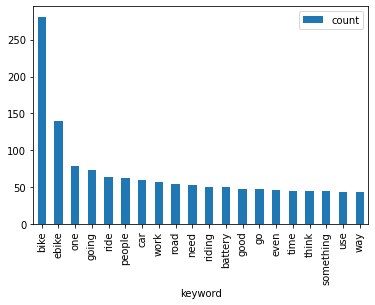

In [12]:
# plot a bar chart with the top keywords
%matplotlib inline
df_kwords.sort_values(by='count', ascending=False).head(20).plot.bar()


In [13]:
# NLTK collocations search (words occuring together): bigrams
# https://www.nltk.org/howto/collocations.html
# http://www.nltk.org/api/nltk.html#nltk.util.bigrams
bigram_measures = nltk.collocations.BigramAssocMeasures()
bigram_finder = BigramCollocationFinder.from_documents([d.split() for d in df_posts['text_clean']])


In [14]:
# filter out bigrams occurring less than three times in the combined text
bigram_finder.apply_freq_filter(3)

In [15]:
# list of bigrams with their frequencies
bigram_freq = list(bigram_finder.ngram_fd.items())
bigram_freq


[(('save', 'money'), 3),
 (('new', 'ebike'), 3),
 (('coupon', 'code'), 3),
 (('rad', 'power'), 3),
 (('bike', 'using'), 3),
 (('getting', 'one'), 5),
 (('looks', 'like'), 4),
 (('electric', 'bike'), 3),
 (('first', 'ebike'), 4),
 (('1000', 'miles'), 5),
 (('local', 'level'), 3),
 (('bike', 'lanes'), 11),
 (('bike', 'rack'), 10),
 (('road', 'bike'), 3),
 (('great', 'bike'), 3),
 (('bike', 'path'), 7),
 (('bus', 'line'), 3),
 (('bike', 'lane'), 8),
 (('riding', 'bike'), 4),
 (('local', 'businesses'), 3),
 (('whole', 'thing'), 3),
 (('bike', 'infrastructure'), 7),
 (('get', 'back'), 3),
 (('kind', 'battery'), 3),
 (('something', 'like'), 9),
 (('lectric', 'xp'), 3),
 (('especially', 'since'), 3),
 (('gon', 'na'), 7),
 (('first', 'ride'), 3),
 (('get', 'work'), 8),
 (('bike', 'even'), 3),
 (('even', 'though'), 3),
 (('never', 'going'), 4),
 (('really', 'like'), 4),
 (('get', 'whole'), 3),
 (('get', 'touch'), 3),
 (('would', 'love'), 7),
 (('get', 'people'), 3),
 (('seems', 'like'), 4),
 ((

In [16]:
# collect into a pandas dataframe
df_freq = pd.DataFrame([(' '.join(k), v) for k,v in bigram_freq], columns=['keyphrase', 'count'])
df_freq.sort_values(by='count', ascending=False, inplace=True)
df_freq.set_index('keyphrase', inplace = True)
df_freq


,count
keyphrase,
bike lanes,11
bike rack,10
belt drive,9
full face,9
something like,9
...,...
might get,3
e bike,3
regular bike,3


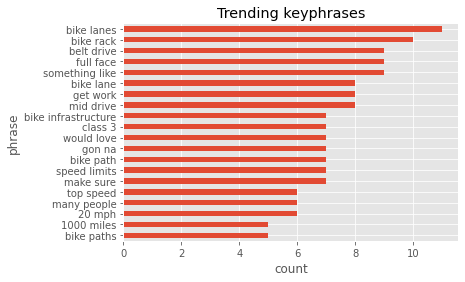

In [17]:
plt.style.use('ggplot')

# render a horizontal bar graph
df_freq.head(20).sort_values(by='count').plot(kind = 'barh')
plt.title('Trending keyphrases')
plt.ylabel('phrase')
plt.xlabel('count')
plt.legend().set_visible(False)
plt.show()
